<a href="https://colab.research.google.com/github/vaibhav-prasad707/SentimentAnalysis_MentalHealth/blob/main/MentalHealth_RiskAssessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install git+https://github.com/tweepy/tweepy.git

  Cloning https://github.com/tweepy/tweepy.git to /tmp/pip-req-build-jiiawzvl
  Running command git clone --filter=blob:none --quiet https://github.com/tweepy/tweepy.git /tmp/pip-req-build-jiiawzvl
  Resolved https://github.com/tweepy/tweepy.git to commit 703f08cff6c1e9dac59e800c784fdb61c0220fe2
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for tweepy: filename=tweepy-4.15.0-py3-none-any.whl size=98745 sha256=54a43dcac3ea83568d3bcac23e49fb1933c18e78b34b06caeba16c0b3f50dc9f
  Stored in directory: /tmp/pip-ephem-wheel-cache-0nbgag64/wheels/dc/75/73/ac2b7c1ac66d801a0b03c7707a2fc16e8689f792b585994c6f
Successfully built tweepy
  Attempting uninstall: tweepy
    Found existing installation: tweepy 4.14.0
    Uninstalling tweepy-4.14.0:
      Successfully uninstalled tweepy-4.14.0


In [9]:
import tweepy

# Authenticate
client = tweepy.Client(bearer_token="AAAAAAAAAAAAAAAAAAAAAAaiyAEAAAAA0yLX0ul3VyJQ54bGBSuL5cgTuBA%3D8DvZozE6vWnpwykc6vPU8j1bhqZzlvOlM1SYBGJcLcXyHVR2Da")

# Fetch tweets
query = "mental health -is:retweet lang:en"
response = client.search_recent_tweets(query=query, max_results=100, tweet_fields=['created_at', 'text'])

tweets = [tweet.text for tweet in response.data]
print(tweets)


['Winter can be tough, but small steps make a big difference:\n🌟 Get outside\n🌟 Reach out\n🌟 Move your body\n🌟 Breathe\n🌟 Celebrate wins\nLet’s prioritise mental health together. 💙 #SelfCareTips', 'Looking for #MentalHealth support in #Bradford District and #Craven this winter? ☃️ The Healthy Minds website is here to help!\n\n❄️ Use the ‘Support finder’ to discover services tailored to your needs\n❄️ Find mental health support information and resources\n\nhttps://t.co/ssmQk8on0T https://t.co/nxI8Yz4sbk', '🥑 Healthy Living for Wellbeing and Mental Health 🥑 \nIs 2025 the year you take extra time to understand the importance of Healthy Living for Mental Health and Wellbeing? \nSign up now: https://t.co/QuYyKp9dL8\n#NewYearNewCareer https://t.co/Mx6Jj0F8bA', '@JaydaBF Poor girl being used by doctors to make $. Mental health crisis and the USA. State of the other girl too. Sad to see.', "Cold water therapy isn’t just about testing your mental toughness, it's health benefits are also incredi

In [10]:
import re

def preprocess_tweet(tweet):
    tweet = re.sub(r'http\S+', '', tweet)  # Remove URLs
    tweet = re.sub(r'@\w+', '', tweet)    # Remove mentions
    tweet = re.sub(r'#\w+', '', tweet)    # Remove hashtags
    tweet = re.sub(r'\W', ' ', tweet)     # Remove special characters
    tweet = tweet.lower()                 # Convert to lowercase
    return tweet

cleaned_tweets = [preprocess_tweet(tweet) for tweet in tweets]
print(cleaned_tweets)


['winter can be tough  but small steps make a big difference    get outside   reach out   move your body   breathe   celebrate wins let s prioritise mental health together    ', 'looking for  support in  district and  this winter     the healthy minds website is here to help      use the  support finder  to discover services tailored to your needs    find mental health support information and resources   ', '  healthy living for wellbeing and mental health    is 2025 the year you take extra time to understand the importance of healthy living for mental health and wellbeing   sign up now    ', ' poor girl being used by doctors to make    mental health crisis and the usa  state of the other girl too  sad to see ', 'cold water therapy isn t just about testing your mental toughness  it s health benefits are also incredible  every second was a challenge  but pushing past comfort zone will make you feel alive  ', 'the physical and mental condition of stroke survivors living in the uk today c

In [11]:
from textblob import TextBlob

def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    return 'positive' if analysis.sentiment.polarity > 0 else 'negative' if analysis.sentiment.polarity < 0 else 'neutral'

sentiments = [analyze_sentiment(tweet) for tweet in cleaned_tweets]
print(sentiments)


['negative', 'positive', 'positive', 'negative', 'positive', 'positive', 'positive', 'positive', 'neutral', 'positive', 'positive', 'positive', 'positive', 'negative', 'positive', 'negative', 'negative', 'negative', 'neutral', 'negative', 'positive', 'positive', 'negative', 'positive', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'positive', 'positive', 'neutral', 'negative', 'negative', 'negative', 'positive', 'positive', 'positive', 'positive', 'positive', 'neutral', 'negative', 'negative', 'negative', 'positive', 'negative', 'neutral', 'negative', 'positive', 'negative', 'negative', 'positive', 'positive', 'neutral', 'positive', 'negative', 'positive', 'negative', 'negative', 'neutral', 'positive', 'negative', 'negative', 'positive', 'negative', 'negative', 'negative', 'positive', 'positive', 'negative', 'positive', 'negative', 'negative', 'positive', 'positive', 'positive', 'negative', 'positive', 'positive', 'positive', 'positive', 'positive', 'negative'

<ipython-input-12-613988b0b42e>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df, palette='viridis')


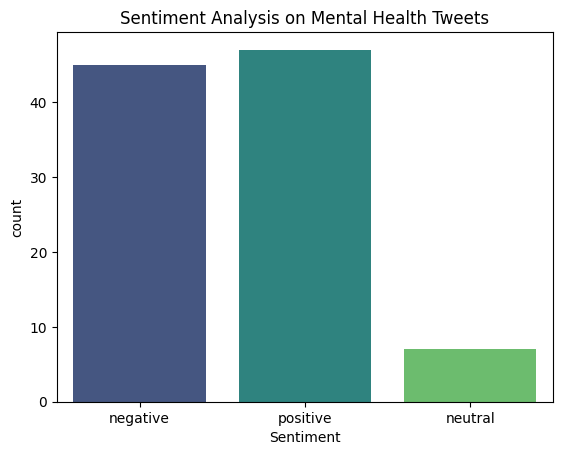

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame({'Tweet': cleaned_tweets, 'Sentiment': sentiments})

# Plot sentiment distribution
sns.countplot(x='Sentiment', data=df, palette='viridis')
plt.title('Sentiment Analysis on Mental Health Tweets')
plt.show()


In [13]:
risk_keywords = {
    'low': ['happy', 'grateful', 'coping', 'calm'],
    'moderate': ['anxiety', 'stress', 'tired', 'lonely'],
    'high': ['hopeless', 'suicidal', 'self-harm', 'worthless']
}

def assess_risk(tweet):
    for word in tweet.split():
        if word in risk_keywords['high']:
            return 'High Risk'
        elif word in risk_keywords['moderate']:
            return 'Moderate Risk'
    return 'Low Risk'

risk_levels = [assess_risk(tweet) for tweet in cleaned_tweets]


In [8]:
print(risk_levels)

['Moderate Risk', 'Low Risk', 'Low Risk', 'Low Risk', 'Low Risk', 'Low Risk', 'Low Risk', 'Low Risk', 'Low Risk', 'Low Risk', 'Low Risk', 'Low Risk', 'Low Risk', 'Low Risk', 'Low Risk', 'Low Risk', 'Low Risk', 'Low Risk', 'Low Risk', 'Low Risk', 'Low Risk', 'Low Risk', 'Low Risk', 'Moderate Risk', 'Low Risk', 'Low Risk', 'Low Risk', 'Low Risk', 'Moderate Risk', 'Moderate Risk', 'Low Risk', 'Moderate Risk', 'Low Risk', 'Moderate Risk', 'Low Risk', 'Low Risk', 'Low Risk', 'Low Risk', 'Moderate Risk', 'Low Risk', 'Moderate Risk', 'Low Risk', 'Moderate Risk', 'Low Risk', 'Low Risk', 'Moderate Risk', 'Moderate Risk', 'Low Risk', 'Moderate Risk', 'Low Risk', 'Moderate Risk', 'Low Risk', 'Moderate Risk', 'Low Risk', 'Moderate Risk', 'Low Risk', 'Moderate Risk', 'Moderate Risk', 'Low Risk', 'Moderate Risk', 'Moderate Risk', 'Low Risk', 'Moderate Risk', 'Moderate Risk', 'Moderate Risk', 'Moderate Risk', 'Low Risk', 'Low Risk', 'Low Risk', 'Low Risk', 'Moderate Risk', 'Low Risk', 'Low Risk', 'Lo

In [15]:
def assess_risk(tweet):
    if any(word in tweet for word in ['hopeless', 'suicidal', 'self-harm']):
        return 'High Risk'
    elif any(word in tweet for word in ['anxiety', 'stress', 'tired']):
        return 'Moderate Risk'
    else:
        return 'Low Risk'

# Add the 'Risk Level' column
df['Risk Level'] = df['Tweet'].apply(assess_risk)


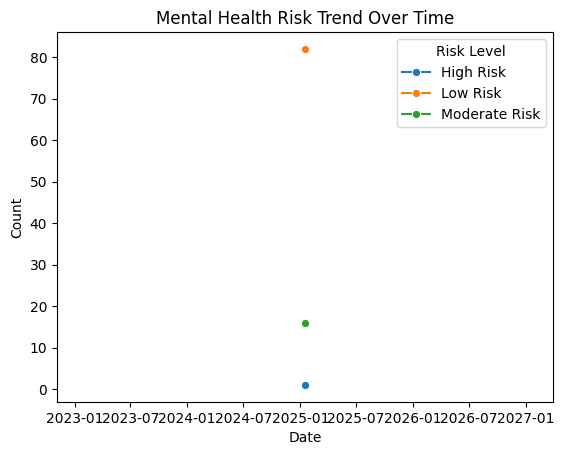

In [16]:
df['Date'] = pd.to_datetime([tweet.created_at for tweet in response.data])
trend_df = df.groupby([df['Date'].dt.date, 'Risk Level']).size().reset_index(name='Count')

# Plot the trend
sns.lineplot(data=trend_df, x='Date', y='Count', hue='Risk Level', marker='o')
plt.title('Mental Health Risk Trend Over Time')
plt.show()
